# Assignment 6: Neural Networks


### You will continue work on the Digit Recognition problem in Kaggle.com this week.   As in Assignment 5, we will assess classification performance accuracy and processing time. 
### Python TensorFlow should be used for Assignment 6. (If you experience difficulty installing TensorFlow, Python scikit-learn may be used as an alternative for Assignment 6.)


## benchmark experiment:

Tested neural network structures should be explored within a benchmark experiment, a factorial design with at least two levels on each of two experimental factors (at least a 2x2 completely crossed design). 
But due to the time required to fit each neural network, we will observe only one trial for each cell in the design. You will build your models on train.csv and submit your forecasts for test.csv to Kaggle.com, providing your name and user ID for each experimental trial..

An example experiment could include two values for the number of nodes per inner layer and two values for the number of inner layers. Various machine learning hyperparameter settings may be used.

Students are encouraged to work in study teams on this assignment, with the understanding that each student must run the code himself/herself and write an independent report of the experimental results. 

## Deliverable: 
    In summary, this assignment asks you to fit a number of neural networks, comparing processing time and performance across experimental treatments.
     Processing time will be recorded for the fitting on the train.csv.  Kaggle.com accuracy scores will be reported for all benchmarks.  

# Management Question
    Suppose you are a financial institution evaluating machine learning technologies for optical character recognition. Initial testing is on the MNIST digits.
     What can you conclude from your benchmark study? Which neural network typology and hyperparameter settings would you recommend as being the most trustworthy?

In [2]:
# import base packages into the namespace for this program
import os
import numpy as np
import pandas as pd
from scipy import stats
from datetime import datetime

#diplay and plotting
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm

import tensorflow as tf
from tensorflow import keras
import kerastuner as kt

import pydot
import graphviz
import getpass

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV





In [3]:
#password block
try:
   pwd = getpass.getpass()
except Exception as err:
   print('Error Occured : ', err)
else:
   print('Password has been entered and is character length:', len(pwd))


Password has been entered and is character length: 12


In [6]:
sender = 'pythonbrianblank@gmail.com'
reciever= 'beblank@gmail.com'

In [7]:
# read data for the Boston Housing Study
Digit_input = pd.read_csv("C:/Users/bblank/Documents/Northwestern MSDS/datasets/Digits-Train.csv")
Digit_test = pd.read_csv("C:/Users/bblank/Documents/Northwestern MSDS/datasets/test.csv")
#sets random seed for entire notebook
RANDOM_SEED = 1

#kfold for CV of models
kfold = KFold(n_splits=5, random_state=RANDOM_SEED)
testkfold = KFold(n_splits=2, random_state=RANDOM_SEED)

In [8]:
Digit_input.label.value_counts().sort_values()

5    3795
8    4063
4    4072
0    4132
6    4137
2    4177
9    4188
3    4351
7    4401
1    4684
Name: label, dtype: int64

In [31]:
root_logdir = os.chdir('C:/Users/bblank/Documents/keras logfiles')

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

TypeError: expected str, bytes or os.PathLike object, not NoneType

In [9]:
#splits into validation and train.
train, val =  train_test_split(Digit_input, test_size = 0.2, random_state = RANDOM_SEED)


y_train = train.label.copy()
X_train = train.drop('label', axis=1)


y_val = val.label.copy()
X_val = val.drop('label', axis=1)

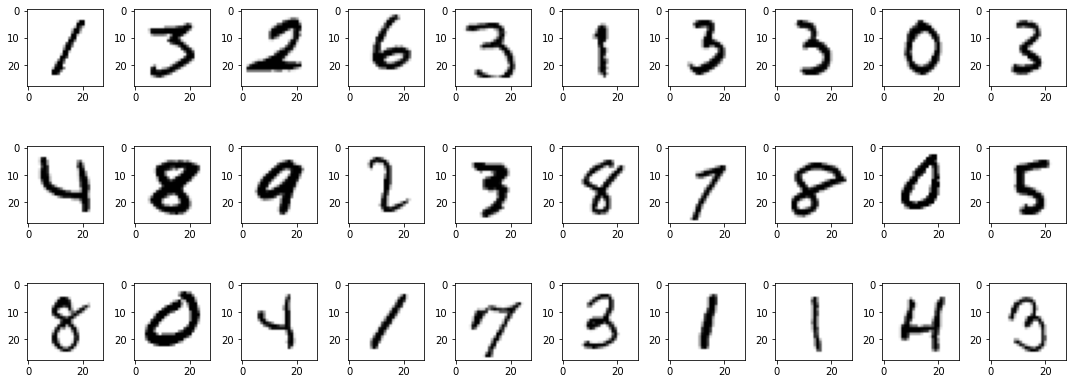

In [10]:
## plots the first 30 digits in 3 rows of 10 images. Data is unscaled
num_row = 3
num_col = 10
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(30):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(X_train.iloc[i]).reshape(28,28), cmap='gist_yarg')
    #ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [11]:
#Scales within pipeline to ensure same scaler.

scale = Pipeline([
        ('scaler', MinMaxScaler())
        ])
        
X_train = scale.fit_transform(X_train)
x_val = scale.fit_transform(X_val)

# Builds and compiles model_2L10N (2 layers; 10 nodes)

In [13]:
model_2L10N= keras.models.Sequential()
model_2L10N.add(keras.layers.Flatten(input_shape=[28,28]))
model_2L10N.add(keras.layers.BatchNormalization())
model_2L10N.add(keras.layers.Dense(10, activation ='relu'))
model_2L10N.add(keras.layers.BatchNormalization())
model_2L10N.add(keras.layers.Dense(10, activation ='softmax'))

model_2L10N.summary()
model_2L10N.compile(loss= "sparse_categorical_crossentropy", 
    optimizer = 'sgd', 
    metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 11,136
Trainable params: 9,548
Non-trainable params: 1,588
_________________________________________________________________


In [14]:
start=datetime.now()

train_2L10N = model_2L10N.fit(X_train, y_train, epochs=30, validation_data = (X_val, y_val))

after_fit = datetime.now()
elapsed = after_fit-start
train_2L10N_elapsed= elapsed.total_seconds()


Epoch 1/30
1050/1050 [==============================] - 2s 2ms/step - loss: 1.2464 - accuracy: 0.6389 - val_loss: 94.3697 - val_accuracy: 0.6321
Epoch 2/30
1050/1050 [==============================] - 2s 1ms/step - loss: 0.5142 - accuracy: 0.8582 - val_loss: 102.8432 - val_accuracy: 0.6748
Epoch 3/30
1050/1050 [==============================] - 2s 1ms/step - loss: 0.4021 - accuracy: 0.8864 - val_loss: 95.6984 - val_accuracy: 0.6950
Epoch 4/30
1050/1050 [==============================] - 2s 1ms/step - loss: 0.3601 - accuracy: 0.8971 - val_loss: 92.5398 - val_accuracy: 0.7089
Epoch 5/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3338 - accuracy: 0.9025 - val_loss: 105.1665 - val_accuracy: 0.6795
Epoch 6/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3182 - accuracy: 0.9053 - val_loss: 100.7385 - val_accuracy: 0.6939
Epoch 7/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3065 - accuracy: 0.9093 - val_loss: 110.7792 - va

In [15]:
model_2L10N_accuracy = np.max(train_2L10N.history['accuracy']).round(3)

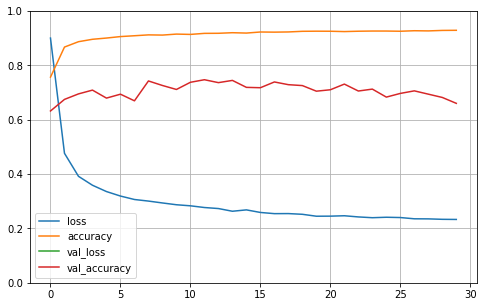

In [16]:
pd.DataFrame(train_2L10N.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Builds and compiles model_2L20N (2 layers; 20 nodes)


import smtplib
sender = str(sender)
reciever = str(reciever)

gmail_user = sender
gmail_password = pwd

sent_from = gmail_user
to = reciever
subject = 'Your Task has completed'
body = 'check your task taht was running\n\n- You'

email_text = """\
From: %s
To: %s
Subject: %s

%s
""" % (sent_from, ", ".join(to), subject, body)

try:
    server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
    server.ehlo()
    server.login(gmail_user, gmail_password)
    server.sendmail(sent_from, to, email_text)
    server.close()

    print ('Email sent!')
except:
    print ('Something went wrong...')

In [17]:
model_2L20N= keras.models.Sequential()
model_2L20N.add(keras.layers.Flatten(input_shape=[28,28]))
model_2L20N.add(keras.layers.Dense(20, activation ='relu'))
model_2L20N.add(keras.layers.Dense(20, activation ='softmax'))

model_2L20N.summary()
model_2L20N.compile(loss= "sparse_categorical_crossentropy", 
    optimizer = 'sgd', 
    metrics = ['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
Total params: 16,120
Trainable params: 16,120
Non-trainable params: 0
_________________________________________________________________


In [18]:
start=datetime.now()

train_2L20N = model_2L20N.fit(X_train, y_train, epochs=30, validation_data = (X_val, y_val))

after_fit = datetime.now()
elapsed = after_fit-start
train_2L20N_elapsed= elapsed.total_seconds()

Epoch 1/30
1050/1050 [==============================] - 2s 1ms/step - loss: 1.6650 - accuracy: 0.5342 - val_loss: 39.0375 - val_accuracy: 0.8673
Epoch 2/30
1050/1050 [==============================] - 1s 1ms/step - loss: 0.4874 - accuracy: 0.8721 - val_loss: 41.7370 - val_accuracy: 0.8849
Epoch 3/30
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3946 - accuracy: 0.8906 - val_loss: 43.4026 - val_accuracy: 0.8907
Epoch 4/30
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3713 - accuracy: 0.8935 - val_loss: 42.1598 - val_accuracy: 0.8976
Epoch 5/30
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3361 - accuracy: 0.9038 - val_loss: 41.7226 - val_accuracy: 0.9002
Epoch 6/30
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3219 - accuracy: 0.9083 - val_loss: 40.7245 - val_accuracy: 0.9055
Epoch 7/30
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2981 - accuracy: 0.9136 - val_loss: 40.1058 - val_ac

In [19]:
model_2L20N_accuracy = np.max(train_2L20N.history['accuracy']).round(3)

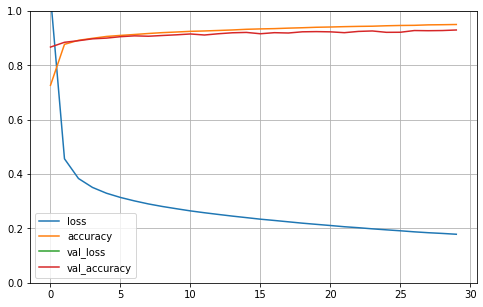

In [20]:
pd.DataFrame(train_2L20N.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Builds and compiles model_5L10N (5 layers; 10 nodes)

In [21]:
model_5L10N= keras.models.Sequential()
model_5L10N.add(keras.layers.Flatten(input_shape=[28,28]))
model_5L10N.add(keras.layers.Dense(10, activation ='relu'))
model_5L10N.add(keras.layers.Dense(10, activation ='relu'))
model_5L10N.add(keras.layers.Dense(10, activation ='relu'))
model_5L10N.add(keras.layers.Dense(10, activation ='relu'))
model_5L10N.add(keras.layers.Dense(10, activation ='softmax'))

model_5L10N.summary()
model_5L10N.compile(loss= "sparse_categorical_crossentropy", 
    optimizer = 'sgd', 
    metrics = ['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
Total params: 8,290
Trainable params: 8,290
Non-trainable params: 0
____________________________________________________

In [22]:
start=datetime.now()

train_5L10N = model_5L10N.fit(X_train, y_train, epochs=30, validation_data = (X_val, y_val))

after_fit = datetime.now()
elapsed = after_fit-start
train_5L10N_elapsed= elapsed.total_seconds()

Epoch 1/30
1050/1050 [==============================] - 1s 1ms/step - loss: 2.1435 - accuracy: 0.1907 - val_loss: 91.1251 - val_accuracy: 0.5526
Epoch 2/30
1050/1050 [==============================] - 1s 993us/step - loss: 1.0353 - accuracy: 0.6552 - val_loss: 84.3353 - val_accuracy: 0.7698
Epoch 3/30
1050/1050 [==============================] - 1s 999us/step - loss: 0.5949 - accuracy: 0.8216 - val_loss: 68.6788 - val_accuracy: 0.8406
Epoch 4/30
1050/1050 [==============================] - 1s 1ms/step - loss: 0.4269 - accuracy: 0.8762 - val_loss: 55.6686 - val_accuracy: 0.8723
Epoch 5/30
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3719 - accuracy: 0.8902 - val_loss: 53.4482 - val_accuracy: 0.8815
Epoch 6/30
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3357 - accuracy: 0.9043 - val_loss: 52.4427 - val_accuracy: 0.8904
Epoch 7/30
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3189 - accuracy: 0.9066 - val_loss: 47.5374 - va

In [23]:
model_5L10N_accuracy = np.max(train_5L10N.history['accuracy']).round(3)

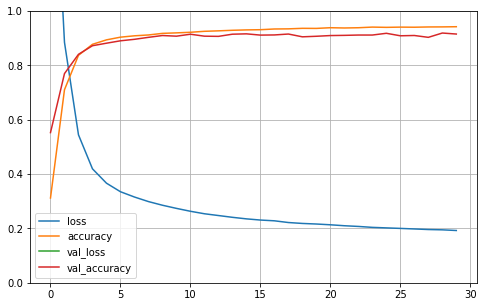

In [24]:
pd.DataFrame(train_5L10N.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Builds and compiles model_5L10N (5 layers; 20 nodes)

In [25]:
model_5L20N= keras.models.Sequential()
model_5L20N.add(keras.layers.Flatten(input_shape=[28,28]))
model_5L20N.add(keras.layers.Dense(20, activation ='relu'))
model_5L20N.add(keras.layers.Dense(20, activation ='relu'))
model_5L20N.add(keras.layers.Dense(20, activation ='relu'))
model_5L20N.add(keras.layers.Dense(20, activation ='relu'))
model_5L20N.add(keras.layers.Dense(20, activation ='softmax'))

model_5L20N.summary()
model_5L20N.compile(loss= "sparse_categorical_crossentropy", 
    optimizer = 'sgd', 
    metrics = ['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_10 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_11 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_12 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_13 (Dense)             (None, 20)                420       
Total params: 17,380
Trainable params: 17,380
Non-trainable params: 0
__________________________________________________

In [26]:
start=datetime.now()

train_5L20N = model_5L10N.fit(X_train, y_train, epochs=30, validation_data = (X_val, y_val))

after_fit = datetime.now()
elapsed = after_fit-start
train_5L20N_elapsed= elapsed.total_seconds()

Epoch 1/30
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1908 - accuracy: 0.9431 - val_loss: 45.1783 - val_accuracy: 0.9079
Epoch 2/30
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1880 - accuracy: 0.9442 - val_loss: 44.2935 - val_accuracy: 0.9133
Epoch 3/30
1050/1050 [==============================] - 1s 997us/step - loss: 0.1873 - accuracy: 0.9443 - val_loss: 44.6197 - val_accuracy: 0.9140
Epoch 4/30
1050/1050 [==============================] - 1s 997us/step - loss: 0.1856 - accuracy: 0.9444 - val_loss: 44.9424 - val_accuracy: 0.9113
Epoch 5/30
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1849 - accuracy: 0.9439 - val_loss: 49.3331 - val_accuracy: 0.9026
Epoch 6/30
1050/1050 [==============================] - 1s 986us/step - loss: 0.1824 - accuracy: 0.9445 - val_loss: 46.1386 - val_accuracy: 0.9126
Epoch 7/30
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1814 - accuracy: 0.9448 - val_loss: 47.1456 - 

In [27]:
model_5L20N_accuracy = np.max(train_5L20N.history['accuracy']).round(3)

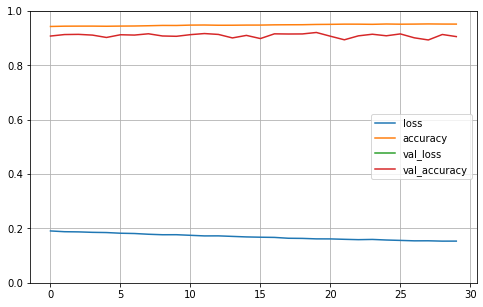

In [28]:
pd.DataFrame(train_5L20N.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [29]:
print(model_2L10N_accuracy)
print(model_2L20N_accuracy)
print(model_5L10N_accuracy)
print(model_5L20N_accuracy)

0.929
0.95
0.942
0.952
